<a href="https://colab.research.google.com/github/dianabohorquez/spotify/blob/main/A01_EDA_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

No todo el mundo entiende de economía, de PBI, de riesgos financieros o de la banca de inversión (totalmente mi caso), pero sí creo que todo el mundo entiende de música, y no hablo de saber acordes o de armar composiciones o si tu gusto es por Bethoven o Rammstein, hablo de cerrar los ojos y realmente sentirla y bajo tu única percepción entenderla.

El entendimiento de la series temporales puede ser algo dificil y sobre todo cuando sus conceptos son explicados sobre aplicaciones "serias" y necesarias, pero para los poco versados (una vez más, ¡como yo!) poco intuitivas.

En este capítulo de EDA vamos a explorar algunas bases de datos de Spotify disponibles en Kaggle, con el objeto de preseleccionar las mejores variables que se adapten a los siguientes capítulos, los cuales desarrollarán el preprocesamiento y modelado y, puesta en producción de los modelos de forecasting.

In [ ]:
# manipulación de data frames y EDA
import pandas as pd

# visualización
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# accessing to google
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)   #to attempt to forcibly remount  force_remount

# setting working directory
import os
os.chdir("/content/gdrive/My Drive/Data Scientist/spotify/datasets/")

# Datasets Disponibles

En [Kaggle](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) están disponibles los siguientes datasets (actualizados a diciembre de 2020):

* **`artist`**: por cada artista su popularidad, géneros y la cantidad de seguidores
* **`data_by_artist_o.csv`**: en este dataset también está presente el género del aritista, pero también las características de este en relación a su sonido (energía, danceability, loudness, etc.)
* **`data_by_genres_o.csv`**: cómo se describe el género en función de su danzabilidad, acústica, energía, popularidad.
* **`data_by_year_o.csv`**: es una pequeña base de de datos que habla de la media que se vio en ese año en función de las características del audio.
* **`data_o.csv`**: este data set contiene 170.653 canciones con sus características de audio, artista, fecha de lanzamiento, popularidad, tiempo, entre otras variables.
* **`tracks`**: es una versión resumida del dataset `data_o.csv`

Dado que el objetivo es aplicar series temporales sobre los datos de spotify, se explorará el dataset `data_o.csv` (renombrado `spotify_o.csv.zip`).

In [ ]:
# importación de datos
#dataYear = pd.read_csv('Bases de Datos/spotify_by_year_o.csv')
#dataArSn = pd.read_csv('Bases de Datos/spotify_o.csv.zip')
spotify = pd.read_csv('spotify_o.csv.zip')

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

Algunas características de la base de datos:
- La base de datos consta de 170.653 registros y 19 variables.
- No todas las canciones tienen la fecha de lanzamiento completo (algunas solo años).
- Las observaciones van del año 1921 a 2020.
- No hay valores faltantes o nulos

## Los Metadatos

Acerca de la descripción de las variables de este dataset, en la [página de desarollador de Spotify](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features) se explican claramente; para el objetivo del trabajo se destacan las siguientes:

- Características de la Canción
    - **id** que asigna Spotify a la canción.
    - El nombre de la canción se describe en la variable **name**.
    - La duración de la pista en milisegundos está dada por la variable **duration_ms**.
    - **explicit** (0 = Contenido no-explícito, 1 = Contenido explícito).
    - **release_date** contiene la fecha de lanzamiento, la mayoría con formato yyyy-mm-dd.
    - **popularity**: la popularidad de una pista es un valor entre 0 y 100, siendo 100 el más popular. *La popularidad se calcula mediante un algoritmo* y se basa, en su mayor parte, en el número total de reproducciones que ha tenido la pista y qué tan recientes son esas reproducciones. En términos generales, las canciones que se reproducen mucho ahora tendrán una mayor popularidad que las canciones que se tocaron mucho en el pasado.

- Características del Audio:
    - **acousticness** es una medida de confianza de 0.0 a 1.0 que habla de la acusticidad de la pista. 1.0 representa una alta confianza en que la pista es acústica.
    - **danceability** describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen tempo, estabilidad del ritmo, fuerza del ritmo y regularidad general. Un valor de 0.0 es menos bailable y 1.0 es más bailable.
    - **energy** con un rango de 0.0 a 1.0 representa una medida perceptiva de intensidad y actividad. Por lo general, las pistas enérgicas se sienten rápidas y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. Las características de percepción que contribuyen a este atributo incluyen rango dinámico, volumen percibido, timbre, frecuencia de inicio y entropía general.
    - **instrumentalness** predice si una pista no contiene voces. Los sonidos “Ooh” y “aah” se tratan como instrumentales en este contexto. Las pistas de rap o de palabra hablada son claramente "vocales". Cuanto más cercano esté el valor de instrumentalidad a 1.0, mayor será la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0,5 están destinados a representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1,0.
    - **valence**: con un rango de 0.0 a 1.0 `valence` describe la positividad musical que transmite una pista. Las pistas con valencia alta suenan más positivas (p. Ej., Feliz, alegre, eufórico), mientras que las pistas con valencia baja suenan más negativas (p. Ej., Triste, deprimido, enojado).
    - El **tempo** global estimado de una pista en pulsaciones por minuto (BPM),con un rango típico de 50 a 150.
    - **liveness** detecta la presencia de una audiencia en la grabación. Los valores de vivacidad más altos (max. 1) representan una mayor probabilidad de que la pista se haya interpretado en vivo. Un valor superior a 0,8 proporciona una gran probabilidad de que la pista esté activa.
    - El volumen general de una pista en decibelios (dB) está dado por **loudness** en cual tiene un rango típico de -60 a 0.
    - **speechiness** detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente parecida a un discurso sea la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cercano a 1.0 será el valor del atributo.

# Análisis Exploratorio de Datos

Para iniciar la exploración de las variables se eliminan algunas de las variables (por ejemplo, `name`, `duration_ms`) y se transforma a la variable `release_date` como marca temporal e índice para el dataset. 

In [ ]:
# Eliminando columnas no útiles para el ejercicio
spotify.drop(['year', 'artists', 'duration_ms', 'explicit', 'id', 'key', 'mode', 'name', 'popularity'], inplace=True, axis=1)

# Habilitando el dataframe para trabajarlo como una serie temporal
spotify.release_date = pd.to_datetime(spotify.release_date)
spotify.set_index('release_date', inplace=True)

**Agrupando por la media de cada año, las variables que caractarizan el audio de las canciones lanzadas cada año presentan la siguiente evolución:**

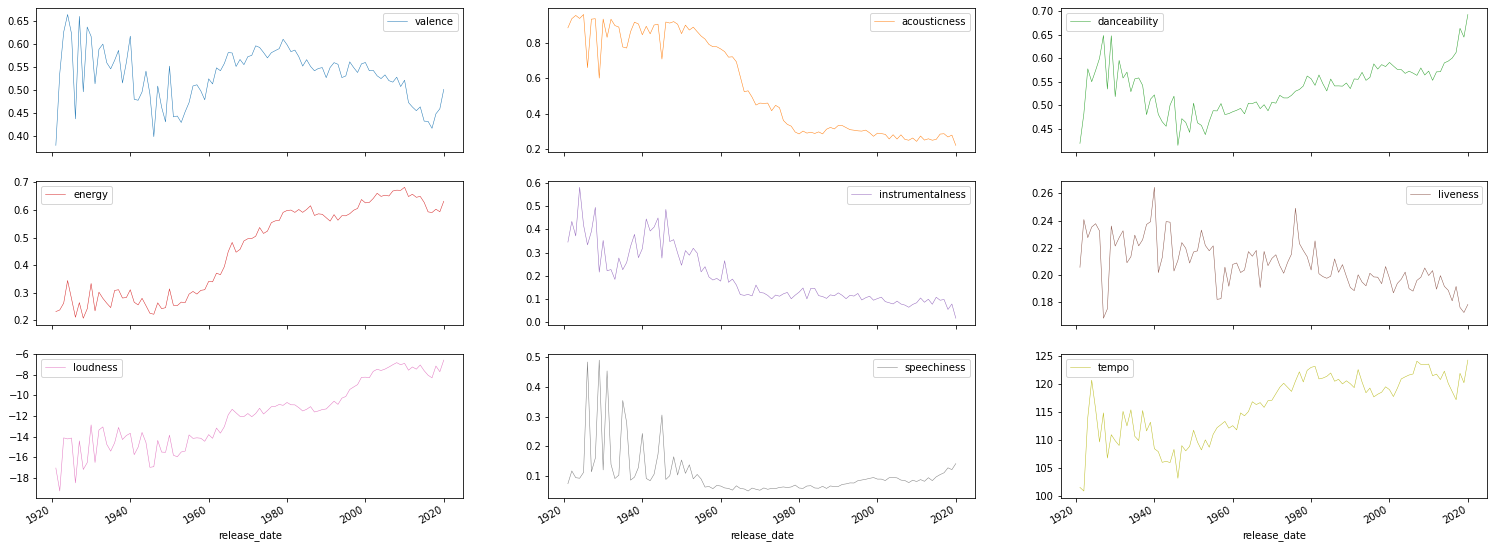

In [ ]:
spotify.groupby(spotify.index.year).mean().plot(subplots=True
                                                , linewidth=0.5
                                                , layout=(3, 3)
                                                , figsize=(26, 10)
                                                , sharex=True
                                                , sharey=False);

**Visualmente se aprecia que no son series estacionarias, pero llama la atención cómo después de cierto año (varía de variable en variable) tendieran a estabilizarse.**

**Graficando la ventana de tiempo 2016 hasta el presente se podría pensar que las series se vuelven estacionarias**

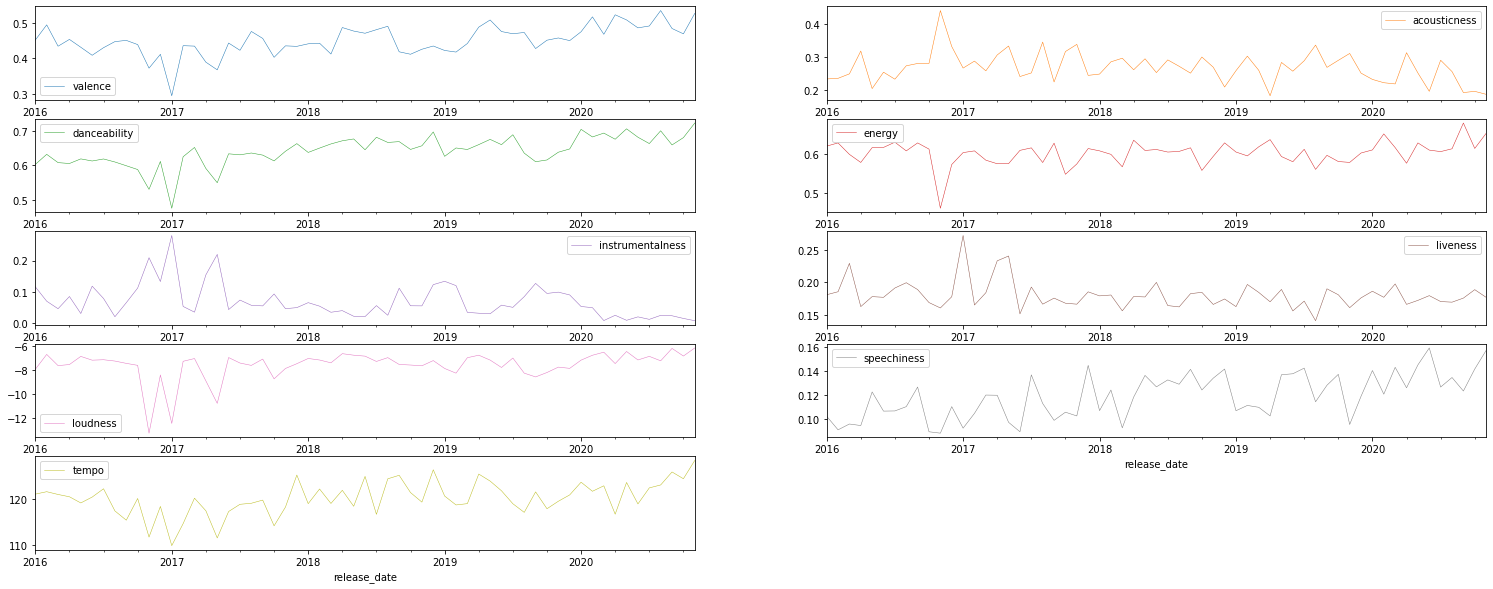

In [ ]:
spotify.groupby(pd.Grouper(freq="M")).mean().loc['2016':].plot(subplots=True
                                                , linewidth=0.5
                                                , layout=(5,2)
                                                , figsize=(26, 10)
                                                , sharex=False
                                                , sharey=False);

**Las variables presentan distintas formas de distribución**

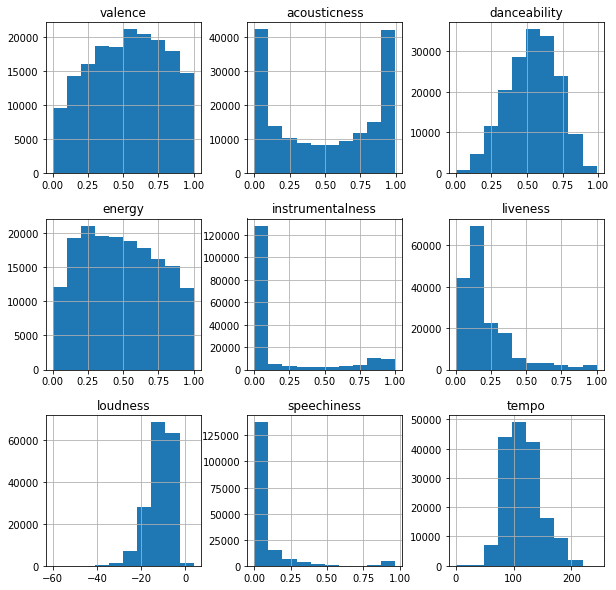

In [ ]:
spotify.hist(figsize=(10,10));

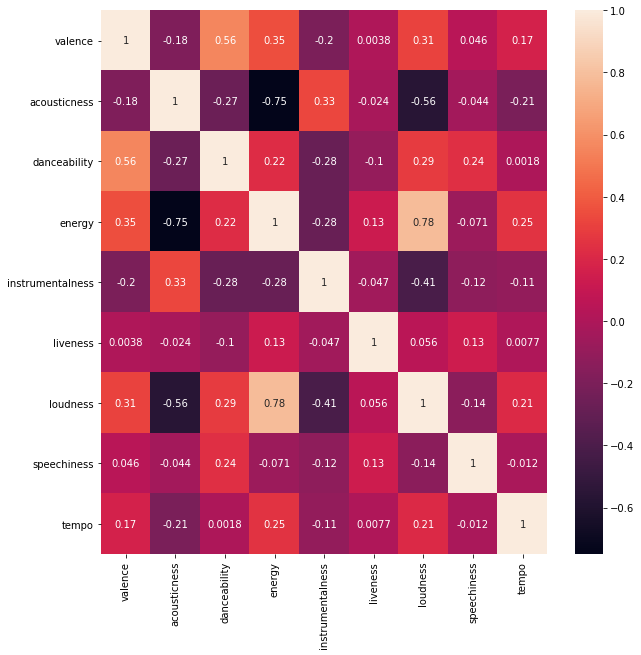

In [ ]:
plt.figure(figsize=(10, 10))
correlacion = spotify.corr(method='pearson')
sns.heatmap(correlacion, annot=True);

**De la observación de las variables y su definición se encuentra de interés trabajar con las series `danceability`, `energy` y `valence`.**

**Considerando todo el data set estas tres variables tienen un comportamiento adecuado para hacer varios análisis de series temporales y no están estrechamente correlacionadas, a pensar de que en cierta medida se pensara que sí, toda vez que, por ejemplo, una canción positiva (`valence` alto) podría creerse apta para el baile (`danceability` alto).**